# Sayaji Chavan
# Intern : Data Science and Business Analytics
# Task : EDA of 'SampleSuperstore' dataset

# Import libraries and dataset

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.axes.Axes.twinx
matplotlib.axes.Axes.twiny
matplotlib.axes.Axes.tick_params
plt.rcParams["figure.figsize"] = (10,5)




In [188]:
data = pd.read_csv('SampleSuperstore.csv')

# Data Cleaning

In [189]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [190]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

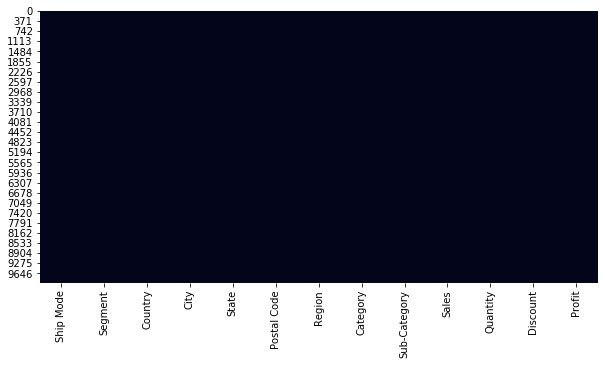

In [191]:
sns.heatmap(data.isnull(),cbar=False)

In [192]:
data.count()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

In [193]:
data.shape


(9994, 13)

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [195]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Data analysis

In [199]:
print("Total Sales : " +str(round(data['Sales'].sum())))
print("Total Profit : " +str(round(data['Profit'].sum())))


Total Sales : 2297201.0
Total Profit : 286397.0


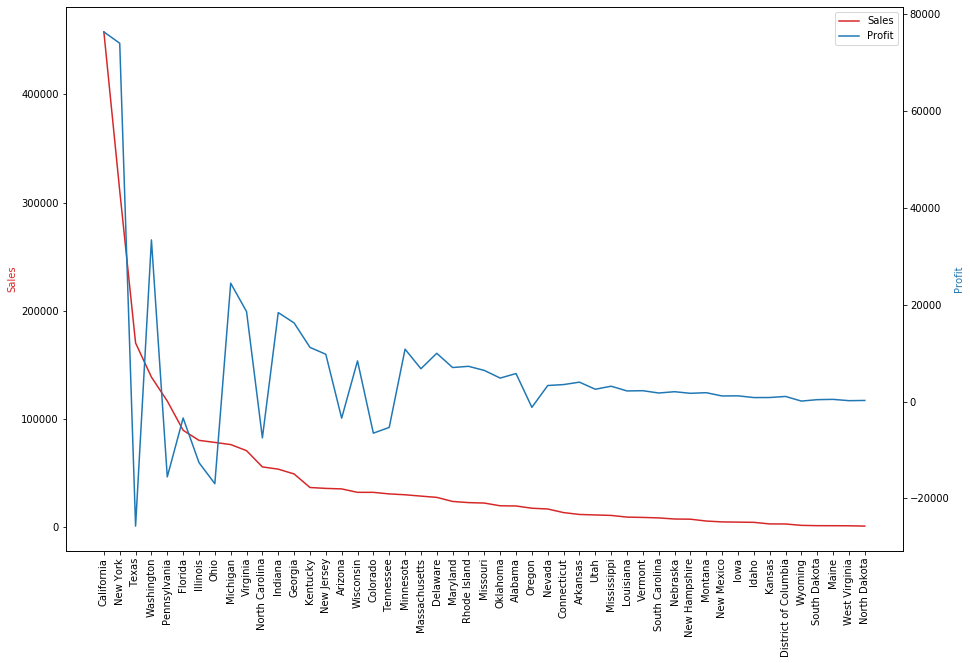

In [200]:
df = pd.DataFrame(data.groupby(['State'])[['Sales','Profit']].sum().sort_values('Sales', ascending = False))
fig = plt.figure(figsize=(15,10))
color = 'tab:red'
ax1 = plt.subplot()
#ax1.set_xlabel('Sales')
ax1.set_ylabel('Sales', color=color)
m = ax1.plot(df['Sales'],  label = "Sales", color=color)
ax1.tick_params(axis = 'y')
ax2 = ax1.twinx()
color = 'tab:blue'
n = ax2.plot(df['Profit'], label ="Profit",color=color)
ax2.set_ylabel('Profit', color=color)  # we already handled the x-label with ax1
mns = m + n
lmns =[l.get_label() for l in mns]
ax1.legend(mns,lmns, loc = 0)
ax1.tick_params(axis = 'y')
ax1.tick_params(axis = 'x', rotation = 90)
#here we can see that even though texas  has huge sales it still doesnt genereate profit.


West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64


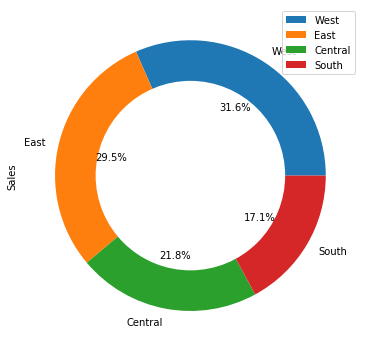

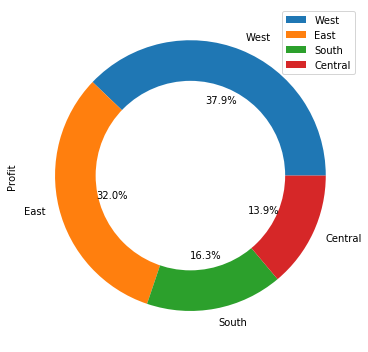

In [201]:
#here we can see that maximum sales is genrated by West followed by east , central and south 
#and profite is generated by west then east , south and central
print(data['Region'].value_counts())
data.groupby('Region')[['Sales']].sum().sort_values('Sales', ascending = False).plot.pie(autopct = "%1.1f%%", subplots = True)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

data.groupby('Region')[['Profit']].sum().sort_values('Profit', ascending = False).plot.pie(autopct = "%1.1f%%", subplots = True)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

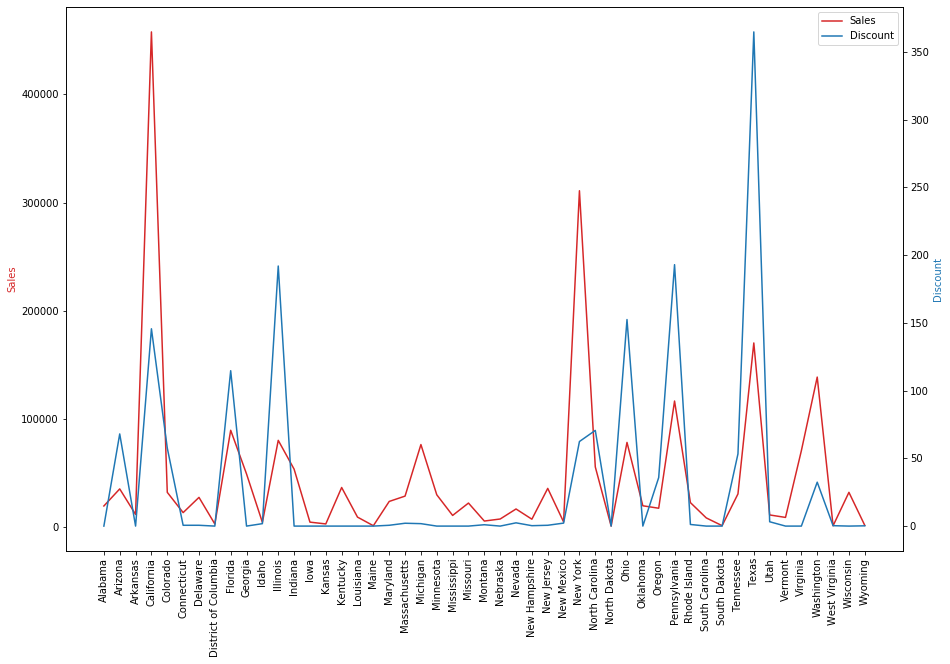

In [203]:
# Chart showing Sales vs Discount 
#here texas and illinois has highest discount but does generate enough sales
# states such as new york, california, michigan, kentucky have high sales but less discount.
df = pd.DataFrame(data.groupby(['State'])[['Sales','Discount']].sum())
fig = plt.figure(figsize=(15,10))
color = 'tab:red'
ax1 = plt.subplot()
#ax1.set_xlabel('Sales')
ax1.set_ylabel('Sales', color=color)
m = ax1.plot(df['Sales'],  label = "Sales", color=color)
ax1.tick_params(axis = 'y')
ax2 = ax1.twinx()
color = 'tab:blue'
n = ax2.plot(df['Discount'], label ="Discount",color=color)
ax2.set_ylabel('Discount', color=color)  # we already handled the x-label with ax1
mns = m + n
lmns =[l.get_label() for l in mns]
ax1.legend(mns,lmns, loc = 0)
ax1.tick_params(axis = 'y')
ax1.tick_params(axis = 'x', rotation = 90)

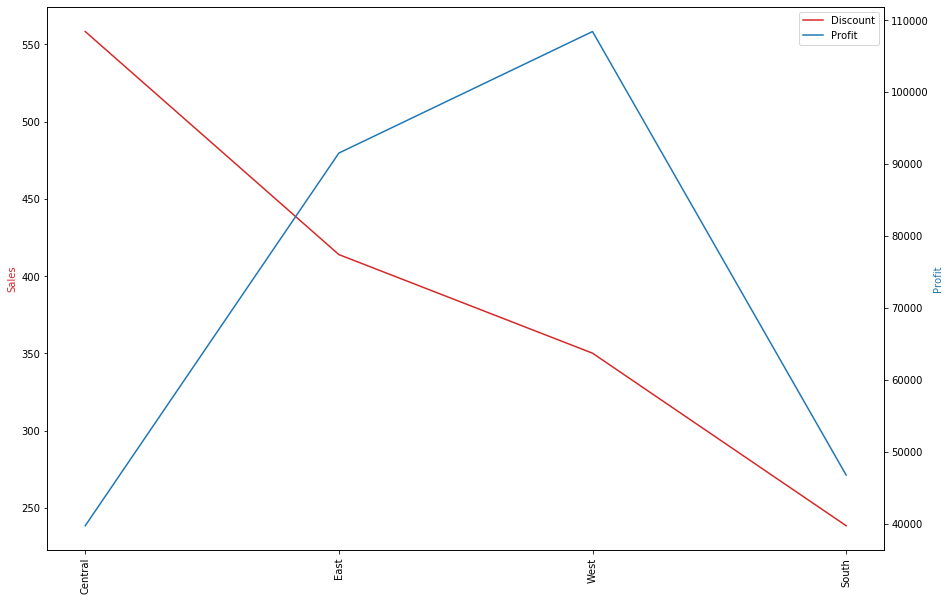

In [222]:
#similiaryly we can see the trend that central states has highdiscount and low profit where as southern states can improve
#thier profits with better discounts.
df = pd.DataFrame(data.groupby(['Region'])[['Discount','Profit']].sum().sort_values('Discount', ascending = False))
fig = plt.figure(figsize=(15,10))
color = 'tab:red'
ax1 = plt.subplot()
#ax1.set_xlabel('Sales')
ax1.set_ylabel('Sales', color=color)
m = ax1.plot(df['Discount'],  label = "Discount", color=color)
ax1.tick_params(axis = 'y')
ax2 = ax1.twinx()
color = 'tab:blue'
n = ax2.plot(df['Profit'], label ="Profit",color=color)
ax2.set_ylabel('Profit', color=color)  # we already handled the x-label with ax1
mns = m + n
lmns =[l.get_label() for l in mns]
ax1.legend(mns,lmns, loc = 0)
ax1.tick_params(axis = 'y')
ax1.tick_params(axis = 'x', rotation = 90)

data.groupby('Category')['Discount'].sum().plot.barh(ylabel = 'Discount', color = 'Red')

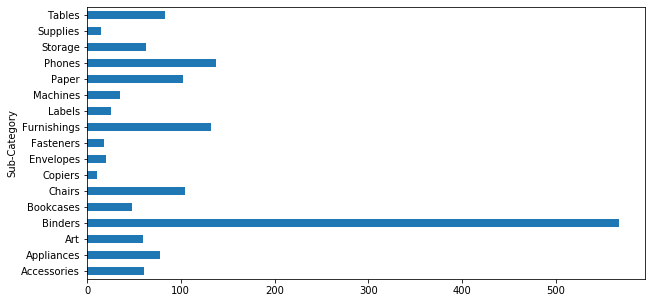

In [206]:
data.groupby('Sub-Category')['Discount'].sum().plot.barh(ylabel = 'Discount')
#we can observe that binders, phones , furnishing and tables have great discounts, whereas copiers, supplies have low discount

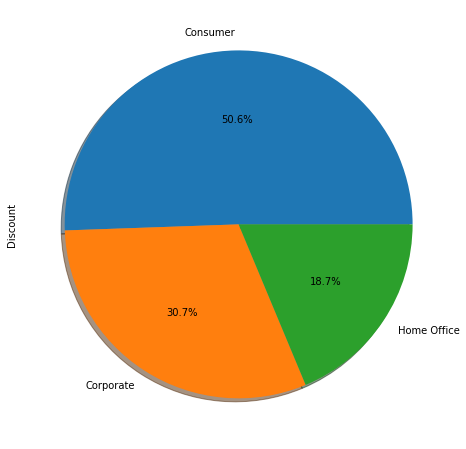

In [225]:
data.groupby('Segment')['Sales'].sum().plot.pie(ylabel = 'Discount', shadow = True, autopct = "%1.1f%%")
#Consumer products have high Sales

<Figure size 720x504 with 0 Axes>

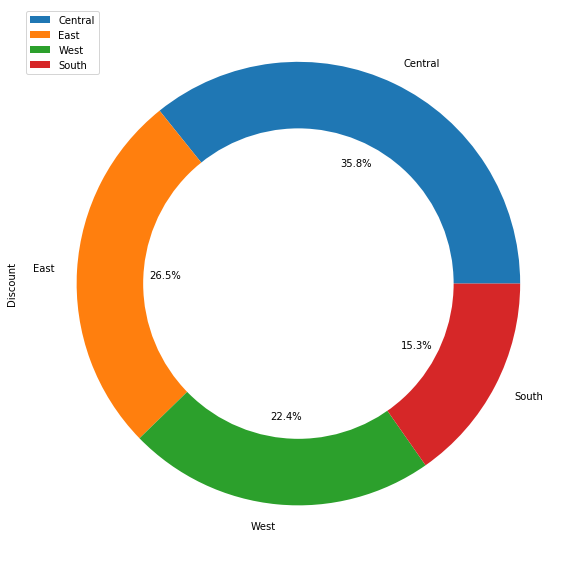

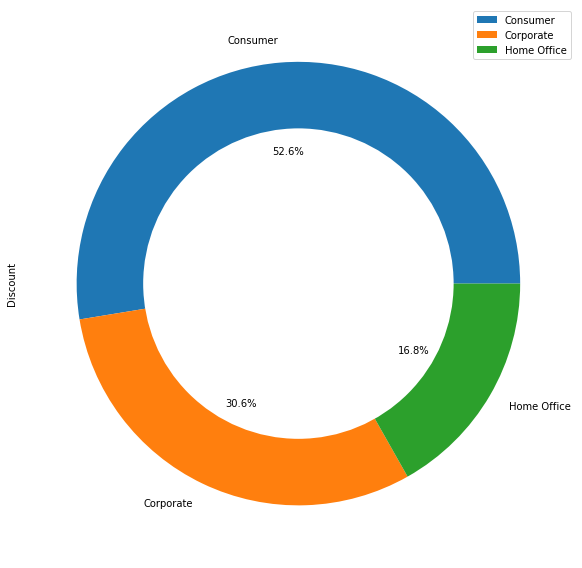

In [224]:
fig = plt.figure(figsize=(10,7))

data.groupby('Region')[['Discount']].sum().sort_values('Discount', ascending = False).plot.pie(autopct = "%1.1f%%", subplots = True)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

data.groupby('Segment')[['Discount']].sum().sort_values('Discount', ascending = False).plot.pie(autopct = "%1.1f%%", subplots = True)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

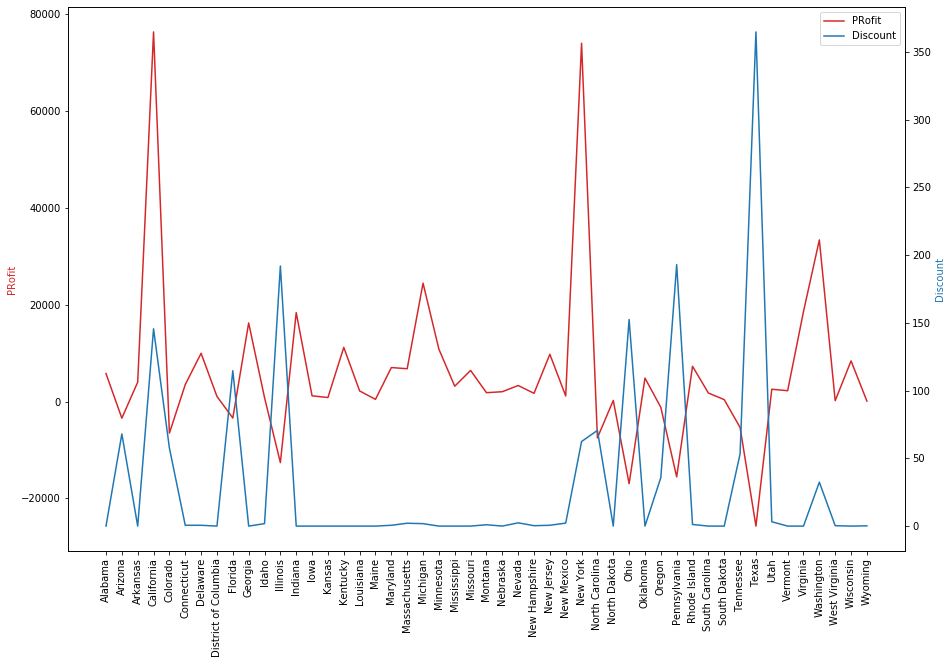

In [226]:
df = pd.DataFrame(data.groupby(['State'])[['Profit','Discount']].sum())
fig = plt.figure(figsize=(15,10))
color = 'tab:red'
ax1 = plt.subplot()
#ax1.set_xlabel('Sales')
ax1.set_ylabel('PRofit', color=color)
m = ax1.plot(df['Profit'],  label = "PRofit", color=color)
ax1.tick_params(axis = 'y')
ax2 = ax1.twinx()
color = 'tab:blue'
n = ax2.plot(df['Discount'], label ="Discount",color=color)
ax2.set_ylabel('Discount', color=color)  # we already handled the x-label with ax1
mns = m + n
lmns =[l.get_label() for l in mns]
ax1.legend(mns,lmns, loc = 0)
ax1.tick_params(axis = 'y')
ax1.tick_params(axis = 'x', rotation = 90)
# Profit vs Discount chart


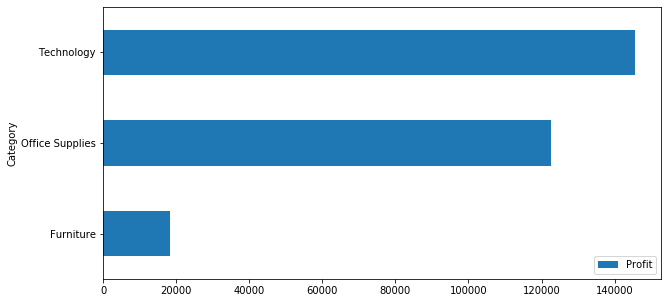

In [210]:
data.groupby('Category')[['Profit']].sum().plot.barh()
# Technology being the most prfitable category and Furniture being the lowest
# more discounts and offers should be given to Furniture Category

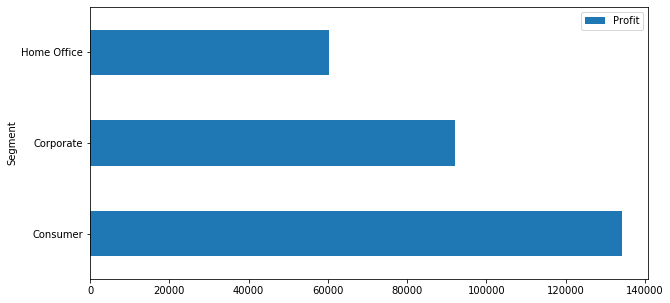

In [211]:
data.groupby('Segment')[['Profit']].sum().plot.barh()

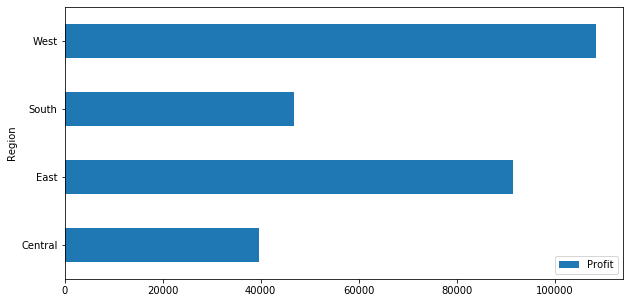

In [212]:
data.groupby('Region')[['Profit']].sum().plot.barh()
# western US is the most profitable region and central the least.

<Figure size 720x1800 with 0 Axes>

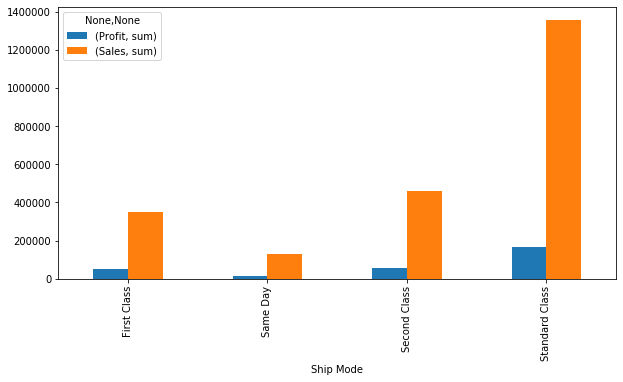

In [213]:
plt.figure(figsize = (10,25))
data.groupby('Ship Mode')[['Profit','Sales']].agg([sum ]).plot.bar()
#higher demand for standard class shipping

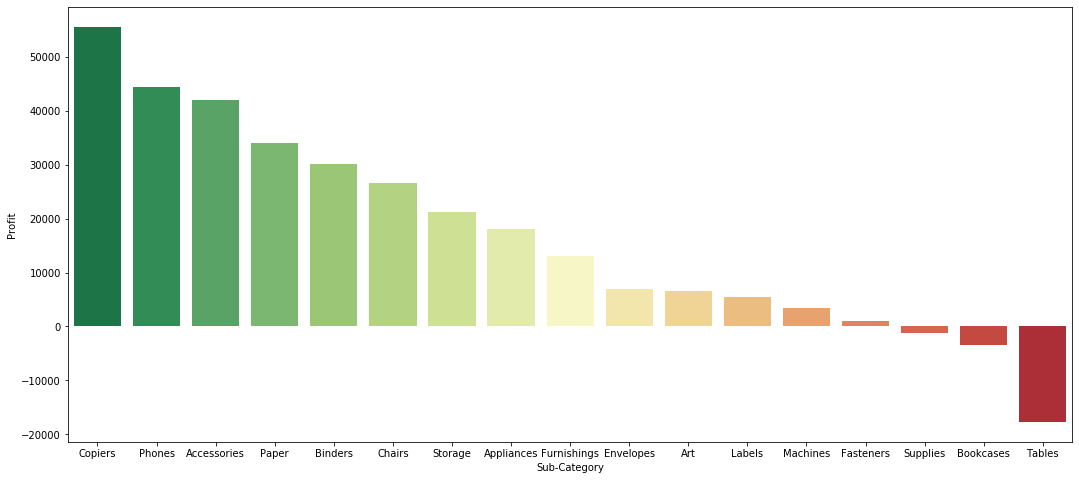

In [214]:
plt.rcParams["figure.figsize"] = (18,8)
df2= pd.DataFrame(data.groupby('Sub-Category', as_index = False)[['Profit']].sum().sort_values('Profit',ascending = False))
sns.barplot('Sub-Category', 'Profit', data=df2, palette = 'RdYlGn_r')
#copiers, phones and accessories are the most prfitable goods 
#whereas tables, bookcases andsupplies are the least

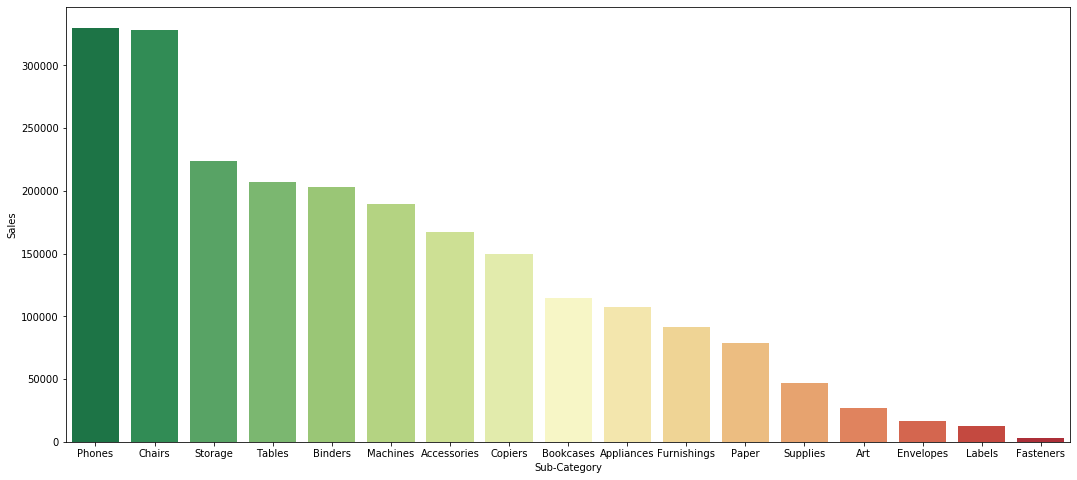

In [241]:
df3= pd.DataFrame(data.groupby('Sub-Category', as_index = False)[['Sales']].sum(
).sort_values('Sales',ascending = False))
sns.barplot('Sub-Category', 'Sales', data=df2, palette = 'RdYlGn_r')
#copiers, phones and accessories are the most sold goods 
#whereas tables, bookcases andsupplies are the least

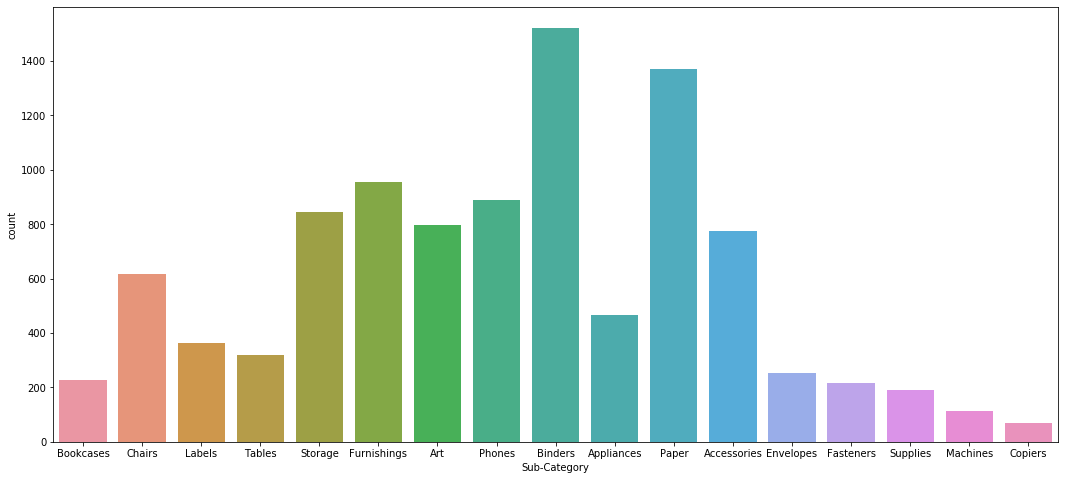

In [239]:
sns.countplot(data['Sub-Category'])

In [215]:
central = data[data['Region'].isin(['Central'])]
east = data[data['Region'].isin(['East'])]
west = data[data['Region'].isin(['West'])]
south = data[data['Region'].isin(['South'])]

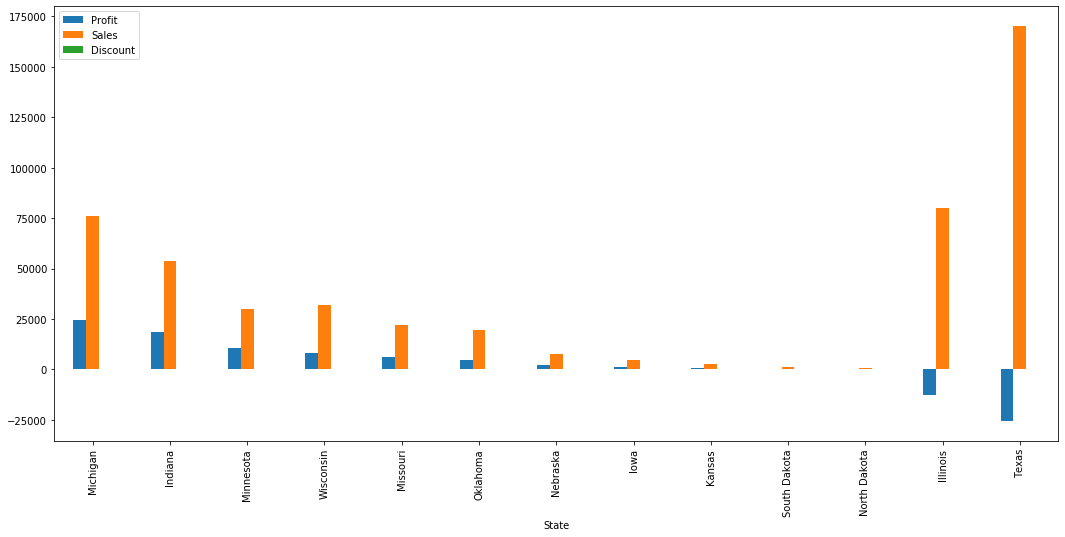

In [227]:
central.groupby('State')[['Profit','Sales','Discount']].sum().sort_values('Profit', ascending = False).plot.bar()

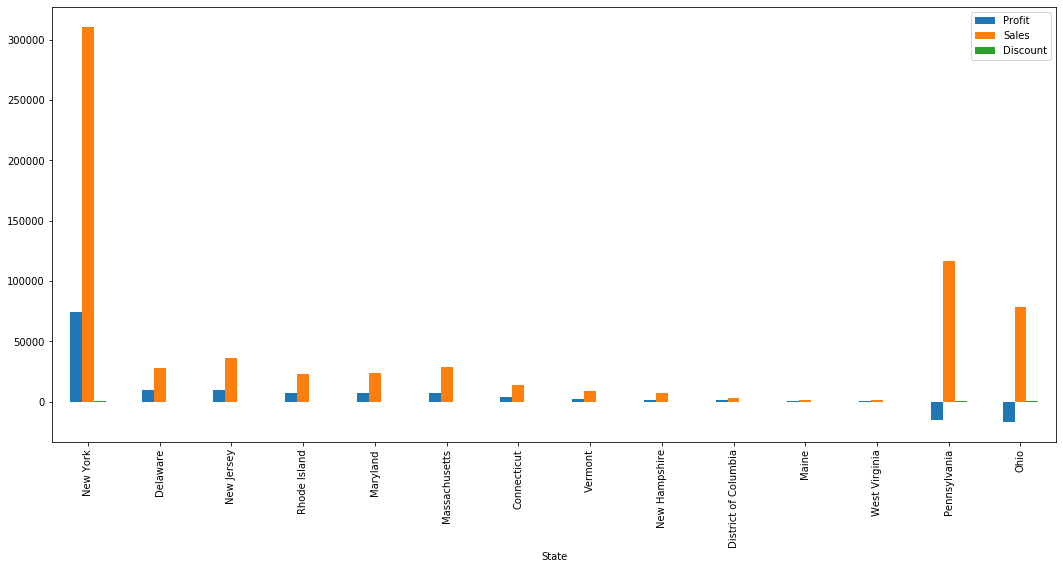

In [228]:
east.groupby('State')[['Profit','Sales','Discount']].sum().sort_values('Profit', ascending = False).plot.bar()


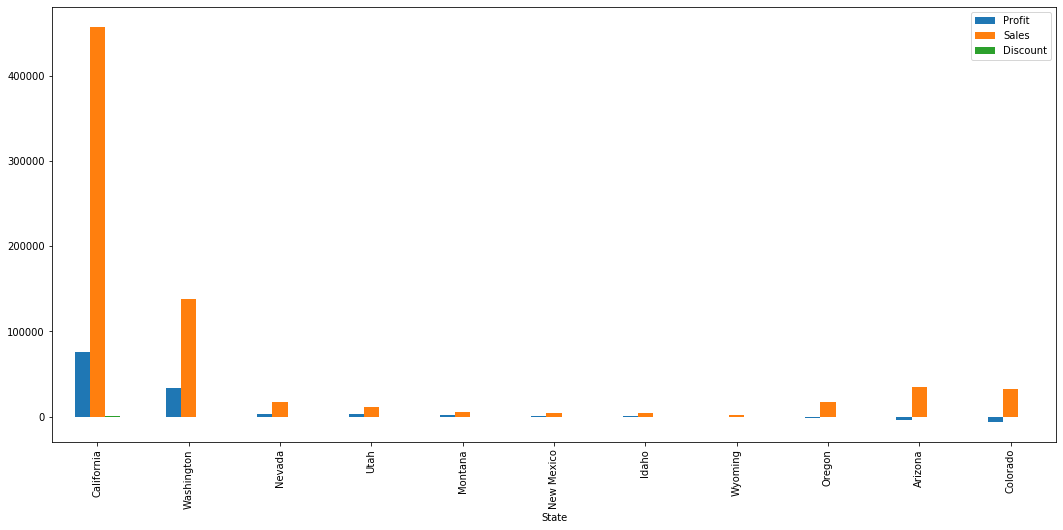

In [218]:
west.groupby('State')[['Profit','Sales','Discount']].sum().sort_values('Profit', ascending = False).plot.bar()

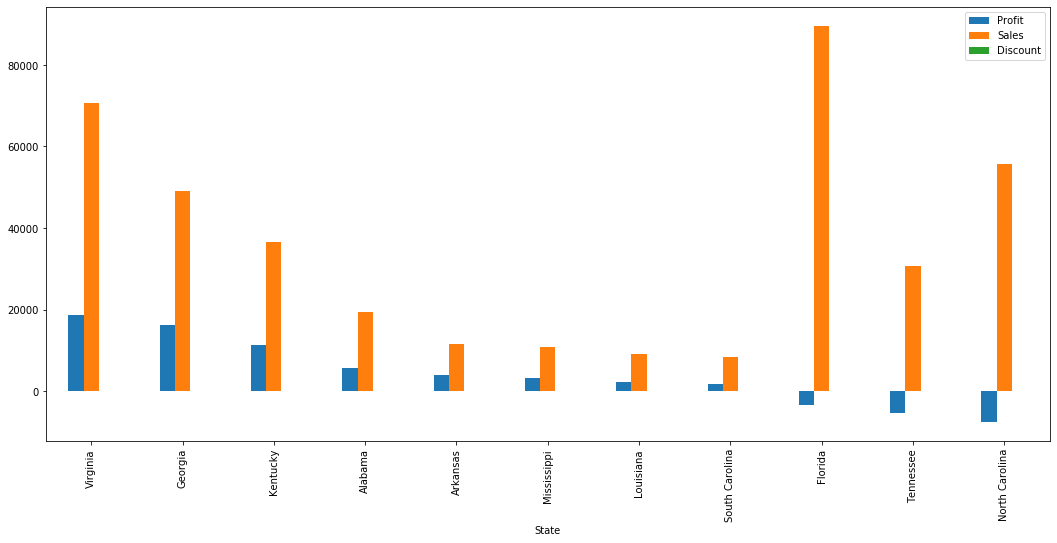

In [219]:
south.groupby('State')[['Profit','Sales','Discount']].sum().sort_values('Profit', ascending = False).plot.bar()

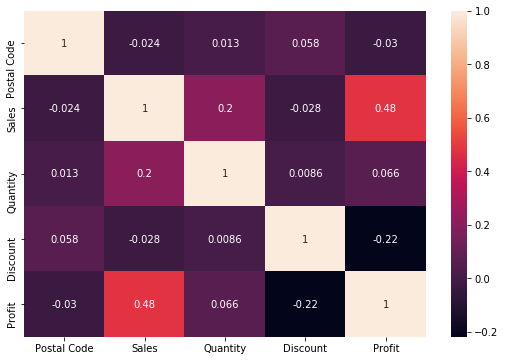

In [220]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(data.corr(), annot= True)
plt.show()

# Conclusion

# The most Profitable States are California, New York, Michigan, Washinton, Virginia
# Phones, Chairs, Tables have the highest sales
# High Sales does not mean High Profit as we can see from Texas and Illinois
# The Supermarket should focus on Souther US as it has high sales and bring some discounts and offers to market
# Focus should also be given to Furniture Category
# There is no correaltion between Profit and Discount.

In [ ]:
Thank you